# Tanguy Dabadie NLP Project - Exploratory Data Analysis

In [88]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# 1. Load the data and first cleaning

In [89]:
file = pd.read_csv('Restaurant reviews.csv')
df = pd.DataFrame(file)
df

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN
...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0,NaN
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,NaN
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,NaN
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0,NaN


To beggin with, the goal of this NLP project is to predict the rating associated to each restaurant review we get and to do so we are goingto use onle two columns : "Rating" and "Review" ones.
Therefore let's get our wanted dataframe:

In [90]:
# We drop the unwnated columns
df = df.drop(['Restaurant','Reviewer','Metadata','Time','Pictures','7514'], axis=1)
df

,Review,Rating
0,"The ambience was good, food was quite good . h...",5
1,Ambience is too good for a pleasant evening. S...,5
2,A must try.. great food great ambience. Thnx f...,5
3,Soumen das and Arun was a great guy. Only beca...,5
4,Food is good.we ordered Kodi drumsticks and ba...,5
...,...,...
9995,Madhumathi Mahajan Well to start with nice cou...,3
9996,This place has never disappointed us.. The foo...,4.5
9997,"Bad rating is mainly because of ""Chicken Bone ...",1.5
9998,I personally love and prefer Chinese Food. Had...,4


In [91]:
print(f'The dataset contains {df.shape[0]} rows (number of reviews) and {df.shape[1]} columns : "Review" and "Rating". \n')
print('Summary statistics for the dataset:')
print(df.describe())

The dataset contains 10000 rows (number of reviews) and 2 columns : "Review" and "Rating". 

Summary statistics for the dataset:
       Review Rating
count    9955   9962
unique   9364     10
top      good      5
freq      237   3832


A first verification that we have to do is that when we will plot the distribution of the ratings we are trying to predict, we should see that "5" is the most frequent one.

In [92]:
df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)

First we can see that they are 'Like' and 'nan' rates that we don't want to use and that could disturb our work. Moreover, We will also git rid of the .5 ones that represent a few elements to simplify my analysis. Let's get rid of them:

In [93]:
# For the 'nan' we need to convert 'nan' string to actual NaN value to drop rows where Rating is NaN
df['Rating'] = df['Rating'].replace('nan', np.nan)
df = df.dropna(subset=['Rating'])

# Then we get rid of the the rest
df = df[~df['Rating'].isin(['Like', '1.5', '2.5', '3.5', '4.5'])]

print(f" The rating unique values are :{df['Rating'].unique()}")
df

 The rating unique values are :['5' '4' '1' '3' '2']


,Review,Rating
0,"The ambience was good, food was quite good . h...",5
1,Ambience is too good for a pleasant evening. S...,5
2,A must try.. great food great ambience. Thnx f...,5
3,Soumen das and Arun was a great guy. Only beca...,5
4,Food is good.we ordered Kodi drumsticks and ba...,5
...,...,...
9991,I was never a fan of Chinese food until I visi...,5
9992,I visited this restaurant with friends and was...,5
9993,"Im going to cut to the chase, The food is exce...",5
9995,Madhumathi Mahajan Well to start with nice cou...,3


## 2. Distribution of rates

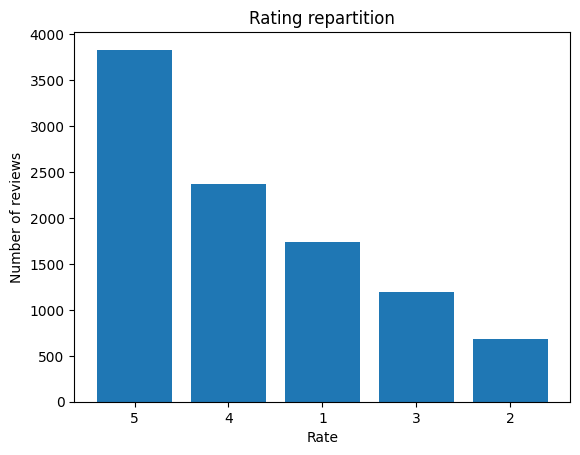

In [94]:
plt.bar(df['Rating'].unique(), df['Rating'].value_counts())
plt.title('Rating repartition')
plt.xlabel('Rate')
plt.ylabel('Number of reviews')
plt.show()

We can know verify the hypotheis we made before : the biggest part of reviews are reviews with a "5" rate.

## 3. Data exploration

The next graph allow us to see if many reviews with the same rate could be written with the approxiamte same number of characters. To make a clearer graph to be able to interpret something, we will get rid of the 5% of reviews with the shorter number and larger number of characters :

In [95]:
plt.figure(figsize=(8,6))
class_labels = ['1', '2', '3', '4', '5']

# Define the shorter and longer reviews
upFivePercent = stats.scoreatpercentile(df['Review'].str.len(), 5)
downFivePercent = stats.scoreatpercentile(df['Review'].str.len(), 95)

# Exclude them
new_df = df[(df['Review'].str.len() > upFivePercent) & (df['Review'].str.len() < downFivePercent)]

<Figure size 800x600 with 0 Axes>

c:\Users\tangu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tangu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tangu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tangu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

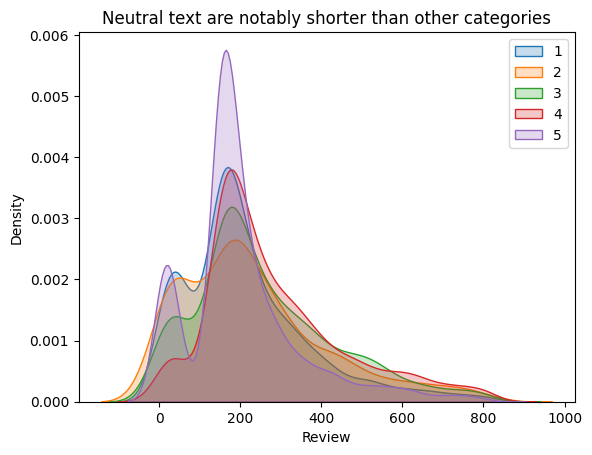

In [96]:
for label in class_labels:
    sns.kdeplot(new_df[new_df['Rating'] == label]['Review'].str.len(), fill=True, label=label)
plt.legend()
plt.title("Neutral text are notably shorter than other categories")
plt.show()

Thanks to this graph, we can see that the best reviews rated with a "5" often have the same number of characters (around 200 which mean those reviews are composed of few sentences)